In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")


In [2]:
iris = datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
from sklearn.utils import shuffle

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
df["target"] =iris.target

In [8]:
df["species"] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [10]:
df = shuffle(df, random_state=42)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
73,6.1,2.8,4.7,1.2,1,versicolor
18,5.7,3.8,1.7,0.3,0,setosa
118,7.7,2.6,6.9,2.3,2,virginica
78,6.0,2.9,4.5,1.5,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
...,...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,1,versicolor
106,4.9,2.5,4.5,1.7,2,virginica
14,5.8,4.0,1.2,0.2,0,setosa
92,5.8,2.6,4.0,1.2,1,versicolor


In [11]:
df.shape

(150, 6)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 73 to 102
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    int64   
 5   species            150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 7.3 KB


In [13]:
df["target"].value_counts()

target
1    50
0    50
2    50
Name: count, dtype: int64

### Explratory Data Analysis

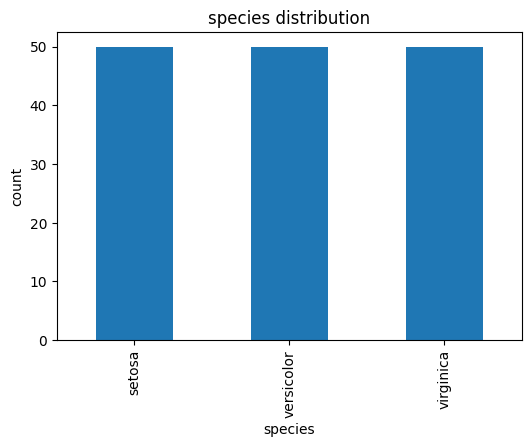

In [14]:
plt.figure(figsize= (6, 4))
df["species"].value_counts().plot(kind="bar")
plt.xlabel("species")
plt.ylabel("count")
plt.title("species distribution")
plt.show()

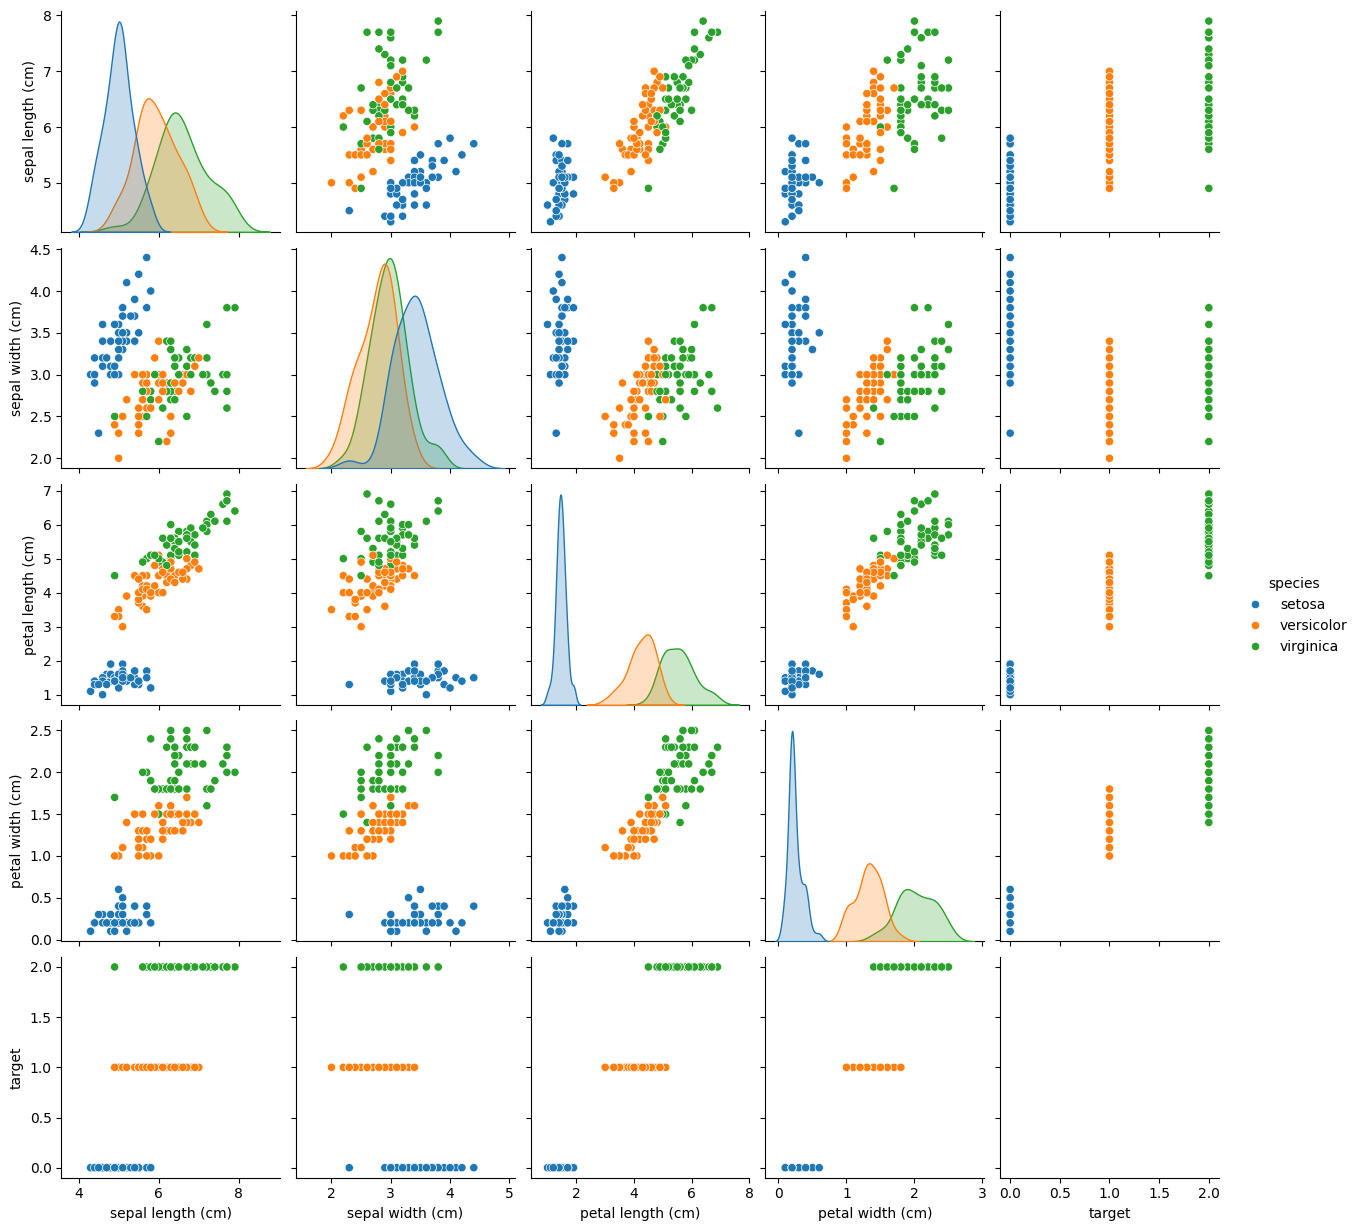

In [15]:
sns.pairplot(df, hue="species")
plt.show()

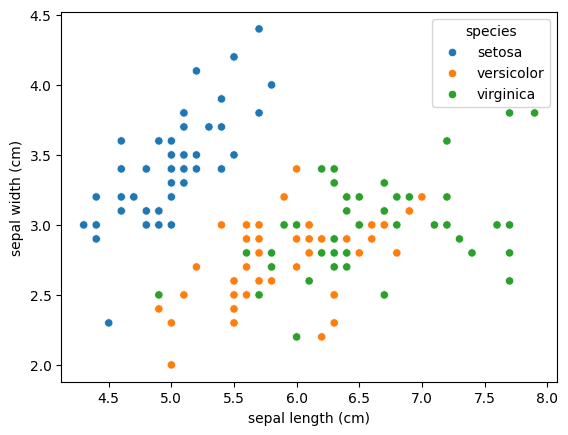

In [16]:
sns.scatterplot(x = df["sepal length (cm)"], y = df["sepal width (cm)"], hue=df["species"]);

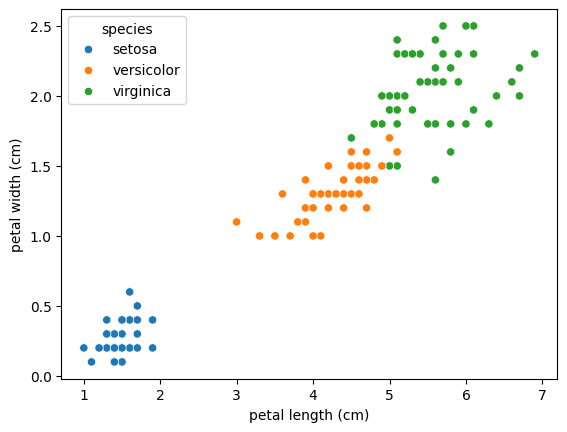

In [17]:
sns.scatterplot(x = df["petal length (cm)"], y = df["petal width (cm)"], hue = df["species"]);

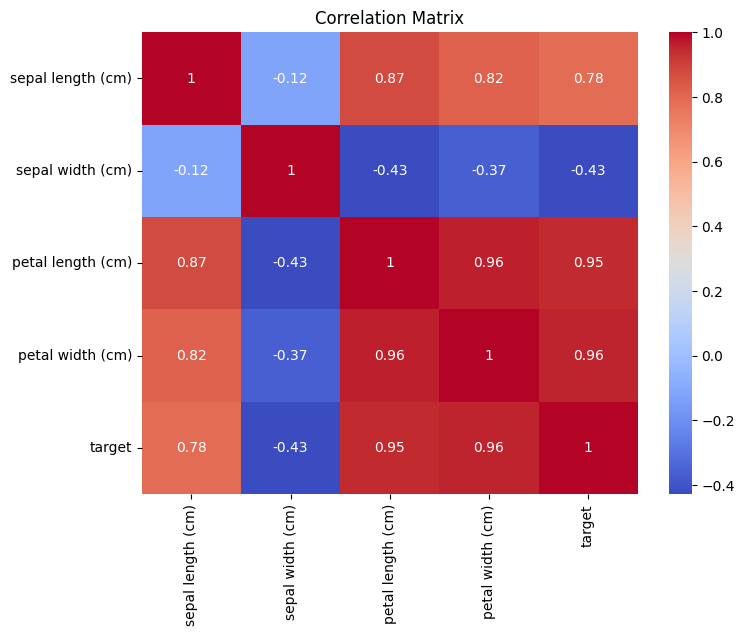

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df.drop(columns=["species"]).corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Matrix")
plt.show()

In [19]:
df.drop(columns=["species"], inplace = True)

#### Prepare Features and Target 

In [20]:
X = df.drop(columns = ["target"])
y = df["target"]

In [21]:
skf = StratifiedKFold(
    n_splits=10
)

#### Baseline model - Logistc Regression

In [40]:
pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression())
])

lr_scores = cross_val_score(
    pipe_lr, X, y, cv = skf
)
lr_mean = lr_scores.mean()
lr_std = lr_scores.std()

In [23]:
lr_mean

np.float64(0.9533333333333335)

#### K-Nearest Neighbors(GridSearchCV)

In [29]:
pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier())
])
param_knn = {
    "model__n_neighbors": [3,5,7,9],
    "model__weights": ["uniform", "distance"]
}

grid_knn = GridSearchCV(
    pipe_knn,
    param_knn,
    cv=skf,
    n_jobs=-1
)

grid_knn.fit(X, y)

knn_mean = grid_knn.best_score_
knn_std = grid_knn.cv_results_["std_test_score"][grid_knn.best_index_]

#### Support Vector Machine(GridSearchCV)

In [32]:
pipe_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVC())
])

param_svm = {
    "model__C": [0.1, 1, 10, 100],
    "model__gamma": ["scale", "auto"],
    "model__kernel": ["linear", "rbf"]
}

grid_svm = GridSearchCV(
    pipe_svm,
    param_svm,
    cv=skf,
    n_jobs=-1
)

grid_svm.fit(X, y)

svm_mean = grid_svm.best_score_
svm_std = grid_svm.cv_results_["std_test_score"][grid_svm.best_index_]

#### Decision Tree

In [34]:
dt = DecisionTreeClassifier(random_state=42)

dt_scores = cross_val_score(
    dt, X, y, cv = skf
)

dt_mean = dt_scores.mean()
dt_std = dt_scores.std()

#### Random Forest(RandomizedSearchCV)


In [41]:
rf = RandomForestClassifier(random_state = 42)

param_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2,5,10],
    "max_features": ["sqrt", "log2"]
}

rand_rf = RandomizedSearchCV(
    rf,
    param_rf,
    n_iter=25,
    n_jobs=-1,
    random_state= 42
)

rand_rf.fit(X, y)

rf_mean = rand_rf.best_score_
rf_std = rand_rf.cv_results_["std_test_score"][rand_rf.best_index_]

#### Gradient Boosing

In [37]:
gb = GradientBoostingClassifier(random_state=42)

gb_score = cross_val_score(
    gb, X, y, cv = skf
)
gb_mean = gb_score.mean()
gb_std = gb_score.std()

In [42]:
results = pd.DataFrame({
    "model":[
        "LogisticRegression",
        "KNN",
        "SVM",
        "Decision Tree",
        "Random Forest",
        "Grdient Boosting"

    ],
    "Mean CV Accuracy": [
        lr_mean,
        knn_mean,
        svm_mean,
        dt_mean,
        rf_mean,
        gb_mean
    ],
    "Std Devation": [
        lr_std,
        knn_std,
        svm_std,
        dt_std,
        rf_std,
        gb_std
    ]
}).sort_values("Mean CV Accuracy", ascending=False)


In [43]:
results

,model,Mean CV Accuracy,Std Devation
1,KNN,0.966667,0.044721
2,SVM,0.960000,0.053333
4,Random Forest,0.960000,0.032660
0,LogisticRegression,0.953333,0.079162
5,Grdient Boosting,0.940000,0.081377
3,Decision Tree,0.926667,0.081377
